In [2]:
import numpy as np
import pandas as pd
from scipy.special import softmax
import matplotlib.pyplot as plt

In [2]:
# new_wavenet_and_feats = softmax(np.load('new_wavenet_and_feats_(best4folds).npy').mean(axis=0), axis=-1)
# new_wavenet = softmax(np.load('new_wavenet.npy').mean(axis=0), axis=-1)
# wavenet_and_feats = np.load('../wavenet-with-shifted-rfc-proba-and-cbr-knn-lgb-mlp/test_wavenet_probs.npy')

In [1]:
# for i in np.random.randint(2_000_000, size=5):
#     plt.plot(new_wavenet_and_feats[i])
#     plt.plot(new_wavenet[i])
#     plt.plot(wavenet_and_feats[i])
#     plt.show()

In [5]:
wavenet_cycle_oof = np.load('../wavenet-lstm-v2-keras-cycle-lr/oof_wavenet_probs.npy')
wavenet_oof = np.load('../wavenet-lstm-v2-keras/oof_wavenet_probs.npy')


wavenet_cycle_test = np.load('../wavenet-lstm-v2-keras-cycle-lr/test_wavenet_probs.npy')
wavenet_test = np.load('../wavenet-lstm-v2-keras/test_wavenet_probs.npy')

# blend_all = np.mean([new_wavenet_and_feats, new_wavenet, wavenet_and_feats], axis=0)

In [ ]:
# blend_all = np.mean([new_wavenet_and_feats, new_wavenet, wavenet_and_feats], axis=0)

In [20]:
def save_submission(y_test, name):
    y_test = np.argmax(y_test, axis=1)
    submission = pd.read_csv("../input/liverpool-ion-switching/sample_submission.csv")
    submission["open_channels"] = np.asarray(y_test, dtype=np.int32)
    submission.to_csv(f"{name}.csv", index=False, float_format="%.4f")

In [3]:
# blend_all = np.mean([new_wavenet_and_feats, new_wavenet, wavenet_and_feats], axis=0)
# for i in np.random.randint(2_000_000, size=5):
#     plt.plot(blend_all[i])
#     plt.show()

In [22]:
save_submission(blend_all, 'blend_all')

In [23]:
pd.read_csv('blend_all.csv').describe()

,time,open_channels
count,2.000000e+06,2.000000e+06
mean,6.000001e+02,1.380756e+00
std,5.773504e+01,2.319989e+00
min,5.000001e+02,0.000000e+00
25%,5.500001e+02,0.000000e+00
50%,6.000000e+02,0.000000e+00
75%,6.500000e+02,2.000000e+00
max,7.000000e+02,1.000000e+01


In [24]:
!kaggle competitions submit -c liverpool-ion-switching -f blend_all.csv -m "np.mean([new_wavenet_and_feats, new_wavenet, wavenet_and_feats], axis=0)"

100%|██████████████████████████████████████| 21.0M/21.0M [00:09<00:00, 2.41MB/s]
Successfully submitted to University of Liverpool - Ion Switching

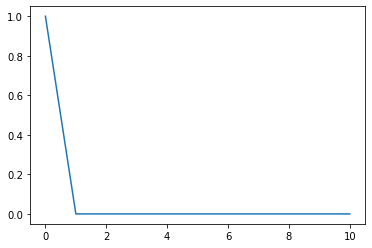

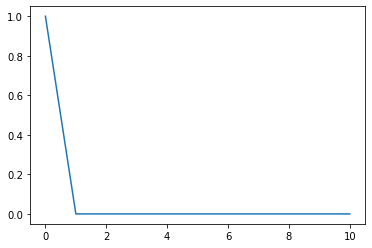

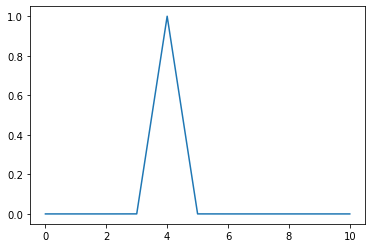

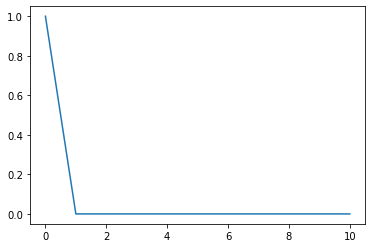

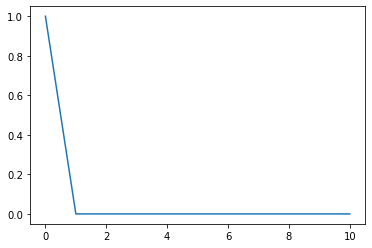

In [26]:
blend_new_wavenets = np.mean([new_wavenet_and_feats, new_wavenet], axis=0)
for i in np.random.randint(2_000_000, size=5):
    plt.plot(blend_new_wavenets[i])
    plt.show()
    
save_submission(blend_new_wavenets, 'blend_new_wavenets')

In [27]:
!kaggle competitions submit -c liverpool-ion-switching -f blend_new_wavenets.csv -m "np.mean([new_wavenet_and_feats, new_wavenet], axis=0)"

100%|██████████████████████████████████████| 21.0M/21.0M [00:07<00:00, 2.99MB/s]
Successfully submitted to University of Liverpool - Ion Switching

In [4]:
!unzip test_probs.zip

Archive:  test_probs.zip
  inflating: test_probs.npy          
